In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mahdimashayekhi/social-media-vs-productivity")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/social-media-vs-productivity


# General overview of the dataset

In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv(path + '/social_media_vs_productivity.csv')

# Display shape
print(f"Number of rows (objects): {df.shape[0]}")
print(f"Number of columns (variables): {df.shape[1]}")

print("\nDescription of variables:")
print("Demographics: age, gender")
print("Work factors: job_type, work_hours_per_day, breaks_during_work, job_satisfaction_score (0-10)")
print("Wellbeing: stress_level (1-10), coffee_consumption_per_day, days_feeling_burnout_per_month, weekly_offline_hours")
print("Social media: daily_social_media_time (hours), social_platform_preference, number_of_notifications, screen_time_before_sleep (hours), uses_focus_apps, has_digital_wellbeing_enabled")
print("Productivity: perceived_productivity_score (0-10), actual_productivity_score (0-10)")

# Basic info and datatypes
print("\nVariable info and types:")
df.info()

print("\nClassifying variables by measurement scale:")
nominal = ['gender', 'job_type', 'social_platform_preference', 'uses_focus_apps', 'has_digital_wellbeing_enabled']
ordinal = ['-']
interval = ['age', 'stress_level', 'number_of_notifications']
ratio = ['work_hours_per_day', 'breaks_during_work', 'job_satisfaction_score',
         'coffee_consumption_per_day', 'days_feeling_burnout_per_month',
         'weekly_offline_hours', 'daily_social_media_time', 'screen_time_before_sleep',
         'perceived_productivity_score', 'actual_productivity_score']

print(f"Nominal variables: {nominal}")
print(f"Ordinal variables: {ordinal}")
print(f"Interval variables: {interval}")
print(f"Ratio variables: {ratio}")

# Display first few rows
print("\nSample rows:")
display(df.head(10))

Number of rows (objects): 30000
Number of columns (variables): 19

Description of variables:
Demographics: age, gender
Work factors: job_type, work_hours_per_day, breaks_during_work, job_satisfaction_score (0-10)
Wellbeing: stress_level (1-10), coffee_consumption_per_day, days_feeling_burnout_per_month, weekly_offline_hours
Social media: daily_social_media_time (hours), social_platform_preference, number_of_notifications, screen_time_before_sleep (hours), uses_focus_apps, has_digital_wellbeing_enabled
Productivity: perceived_productivity_score (0-10), actual_productivity_score (0-10)

Variable info and types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                 

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
5,38,Male,Finance,1.512568,Twitter,50,6.429312,NaN,4.081026,5.0,5.515251,1.518612,5,False,True,5,2,0.000000,4.568728
6,56,Female,Unemployed,4.381070,TikTok,60,3.902309,6.420989,5.976408,7.0,7.549849,2.252624,4,False,False,4,20,24.084905,5.501373
7,36,Female,Education,4.089168,Twitter,49,6.560467,2.681830,2.446927,4.0,6.325507,0.747998,2,False,False,4,29,8.419648,3.444376
8,40,Female,Education,4.097401,Instagram,57,5.839590,3.219022,3.004240,4.0,NaN,0.000000,10,False,True,2,10,0.000000,1.960131
9,28,Other,IT,7.595577,Twitter,64,5.888936,NaN,NaN,3.0,6.761952,1.449841,10,False,False,1,18,6.959377,6.808102


# Missing values

In [11]:
# Display rows with at least one missing value
rows_with_missing = df[df.isnull().any(axis=1)]
print(f"Number of rows with missing values: {len(rows_with_missing)}")
#display(rows_with_missing.head(10))

# Check for missing values
print("\nMissing values per column:\n")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
}).sort_values(by='Percentage', ascending=False)

display(missing_df[missing_df['Missing Values'] > 0])

# Possible reasons
print("\nPossible reason of missing values - information was not collected. (MCAR)\nAction - since dataset is large (30 000 objects), records with missing values will be deleted.")

Number of rows with missing values: 12926

Missing values per column:



,Missing Values,Percentage
daily_social_media_time,2765,9.216667
job_satisfaction_score,2730,9.100000
sleep_hours,2598,8.660000
actual_productivity_score,2365,7.883333
screen_time_before_sleep,2211,7.370000
stress_level,1904,6.346667
perceived_productivity_score,1614,5.380000



Possible reason of missing values - information was not collected. (MCAR)
Action - since dataset is large (30 000 objects), records with missing values will be deleted.


In [12]:
df.dropna(inplace=True)

print("\nRemaining missing values:")
print(df.isnull().sum().sum())


Remaining missing values:
0


# Outliers

In [13]:
# --- IQR Method ---

# List of numeric columns
numeric_columns = [ 'age', 'stress_level', 'number_of_notifications',
        'work_hours_per_day', 'breaks_during_work', 'job_satisfaction_score',
        'coffee_consumption_per_day', 'days_feeling_burnout_per_month',
        'weekly_offline_hours', 'daily_social_media_time', 'screen_time_before_sleep',
        'perceived_productivity_score', 'actual_productivity_score'
]

# Detect outliers using IQR
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} — Outliers: {len(outliers)}")
    if len(outliers) > 0:
      print(f"\n{outliers[col]}")

    # Remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print("-----------------------------------------------------------------------------")


age — Outliers: 0
-----------------------------------------------------------------------------
stress_level — Outliers: 0
-----------------------------------------------------------------------------
number_of_notifications — Outliers: 158

411      39
451      36
573      83
687      84
726      81
         ..
29579    84
29589    86
29719    38
29906    36
29992    39
Name: number_of_notifications, Length: 158, dtype: int64
-----------------------------------------------------------------------------
work_hours_per_day — Outliers: 67

115      1.506037
365      1.302068
662      1.281870
1115     1.227717
1821     1.339404
           ...   
28019    1.619479
28227    1.580464
29171    1.558480
29211    0.000000
29858    1.568378
Name: work_hours_per_day, Length: 67, dtype: float64
-----------------------------------------------------------------------------
breaks_during_work — Outliers: 0
-----------------------------------------------------------------------------
job_satisfaction

# Feature engineering

In [16]:
# Redundant/uninformative variables
print("Redundant/uninformative variables: uses_focus_apps, has_digital_wellbeing_enabled, coffee_consumption_per_day, perceived_productivity_score")

#colums removal
columns_to_remove = ['uses_focus_apps' , 'has_digital_wellbeing_enabled', 'coffee_consumption_per_day', 'perceived_productivity_score']

df.drop(columns=columns_to_remove, axis=1, inplace=True)
print("\nDataset after removing columns:")
display(df.head())

Redundant/uninformative variables: uses_focus_apps, has_digital_wellbeing_enabled, coffee_consumption_per_day, perceived_productivity_score

Dataset after removing columns:


,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,7.291555,4.0,5.116546,0.419102,8,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.165093,7.0,5.103897,0.671519,7,25,0.000000,3.412427
6,56,Female,Unemployed,4.381070,TikTok,60,3.902309,5.976408,7.0,7.549849,2.252624,4,20,24.084905,5.501373
7,36,Female,Education,4.089168,Twitter,49,6.560467,2.446927,4.0,6.325507,0.747998,2,29,8.419648,3.444376
10,28,Male,IT,3.341559,Twitter,57,11.022035,7.983252,4.0,3.952547,1.028640,5,3,13.514515,9.414637


**Meaningful/informative variables**

daily_social_media_time,

work_hours_per_day,

actual_productivity_score,

days_feeling_burnout_per_month


# Univariate analysis (individual variables)

In [24]:
# Defining a function to format the autopct string
def make_autopct(values):
    def my_autopct(pct):
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}% ({val})'
    return my_autopct

In [18]:
numeric_columns = [ 'age', 'stress_level', 'number_of_notifications',
        'work_hours_per_day', 'breaks_during_work', 'job_satisfaction_score',
        'days_feeling_burnout_per_month',
        'weekly_offline_hours', 'daily_social_media_time', 'screen_time_before_sleep',
        'actual_productivity_score']

print(df[numeric_columns].describe().T)

                                  count       mean        std        min  \
age                             16503.0  41.452584  13.821627  18.000000   
stress_level                    16503.0   5.521663   2.868233   1.000000   
number_of_notifications         16503.0  59.881597   7.493409  40.000000   
work_hours_per_day              16503.0   7.016934   1.963524   1.641766   
breaks_during_work              16503.0   4.991820   3.183496   0.000000   
job_satisfaction_score          16503.0   4.948692   2.129140   0.000000   
days_feeling_burnout_per_month  16503.0  15.541659   9.247873   0.000000   
weekly_offline_hours            16503.0  10.283988   7.118997   0.000000   
daily_social_media_time         16503.0   3.038271   1.854632   0.000000   
screen_time_before_sleep        16503.0   1.017513   0.644990   0.000000   
actual_productivity_score       16503.0   4.947289   1.887432   0.298476   

                                      25%        50%        75%        max  
age       

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

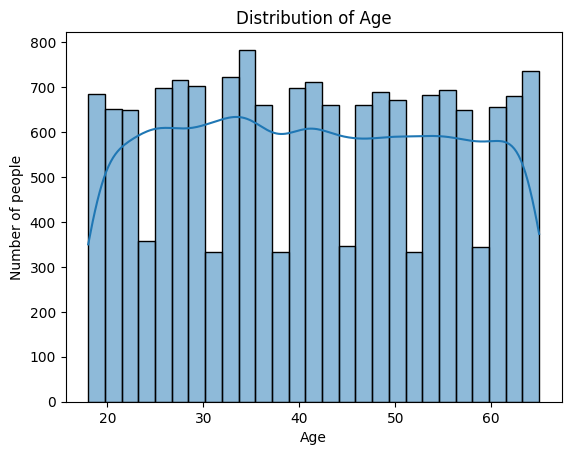

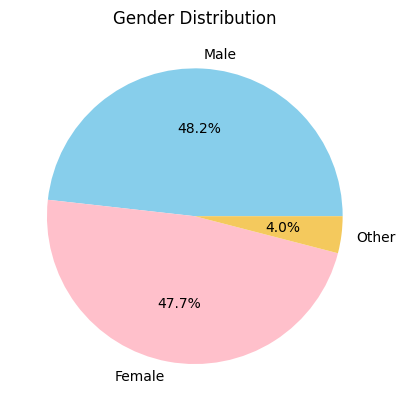

In [41]:
#DEMOGRAFICS

#Age
sns.histplot(df['age'], kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.show()

print("\n")

#Gender
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=["skyblue","pink", "#F4C95D"])
plt.title("Gender Distribution")
plt.ylabel('')
plt.show()


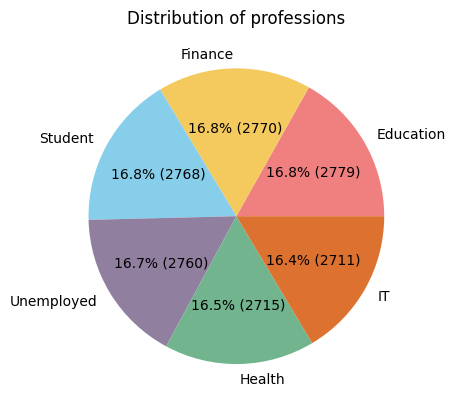

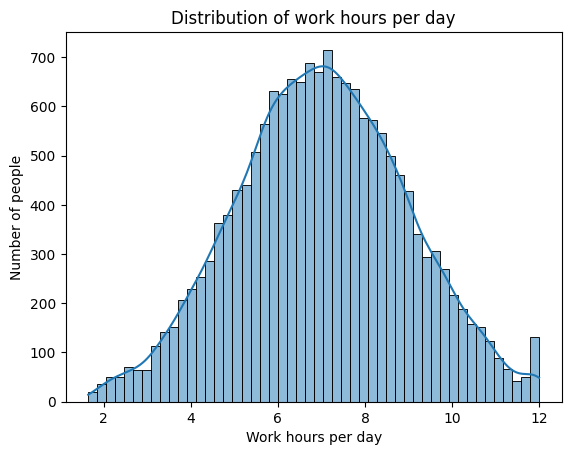

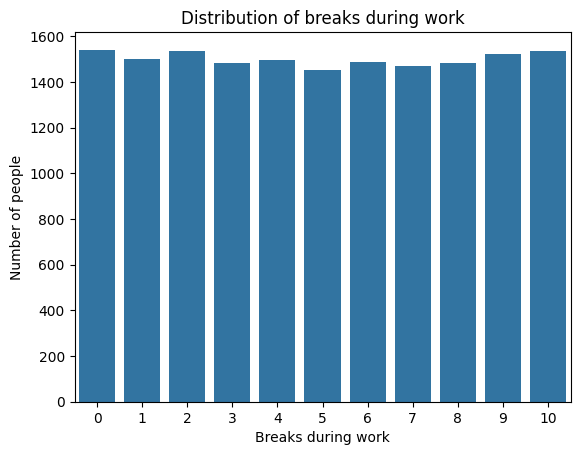

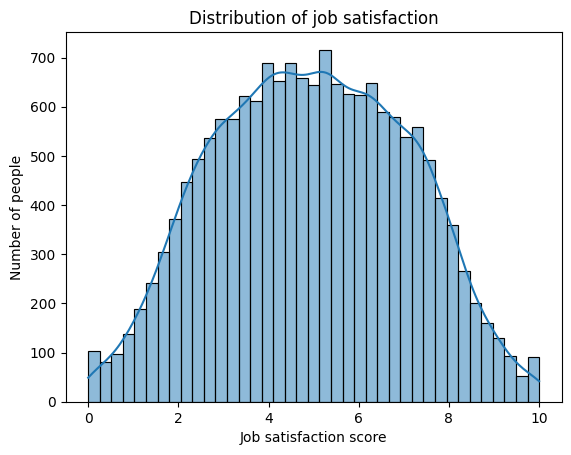

In [49]:
#WORK FACTORS

#job_type
variable = df["job_type"].value_counts()
sizes = variable.values
total = sum(sizes)
variable.plot.pie(autopct=make_autopct(sizes), colors=['lightcoral', '#F4C95D', "skyblue", "#907F9F", "#71B48D", "#DD7230"])
plt.title("Distribution of professions")
plt.ylabel('')
plt.show()

print("\n")

#work_hours_per_day
sns.histplot(df['work_hours_per_day'], kde=True)
plt.title("Distribution of work hours per day")
plt.xlabel("Work hours per day")
plt.ylabel("Number of people")
plt.show()

print("\n")

#breaks_during_work
sns.countplot(x='breaks_during_work', data=df)
plt.title("Distribution of breaks during work")
plt.xlabel("Breaks during work")
plt.ylabel("Number of people")
plt.show()

print("\n")

#job_satisfaction_score
sns.histplot(df['job_satisfaction_score'], kde=True)
plt.title("Distribution of job satisfaction")
plt.xlabel("Job satisfaction score")
plt.ylabel("Number of people")
plt.show()

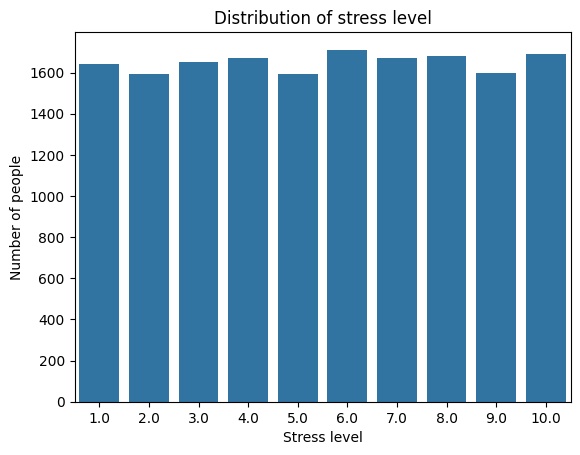

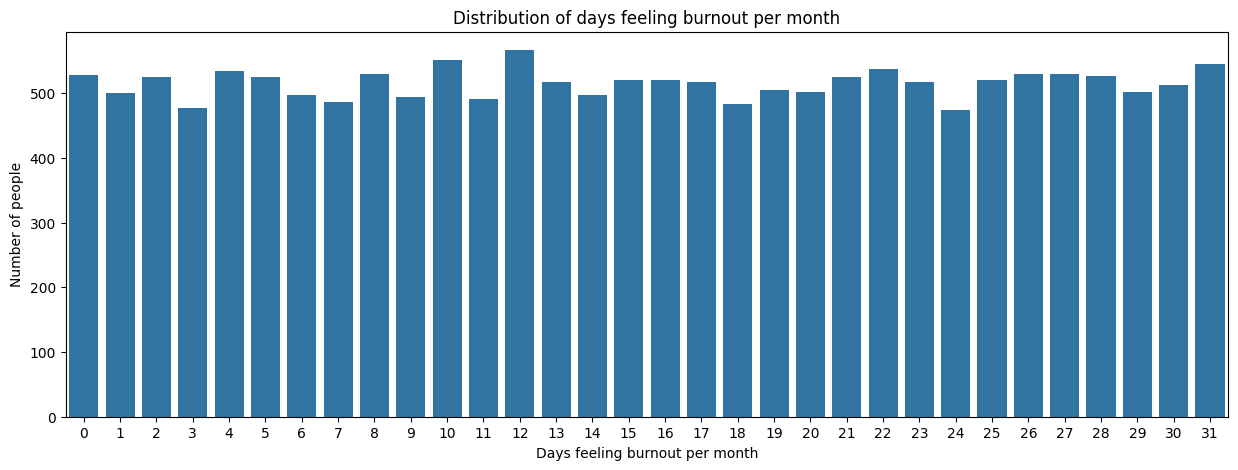

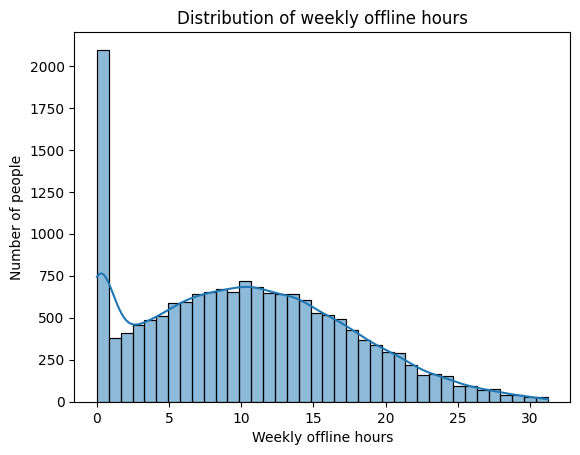

In [54]:
#WELLBEING

#stress_level
sns.countplot(x='stress_level', data=df)
plt.title("Distribution of stress level")
plt.xlabel("Stress level")
plt.ylabel("Number of people")
plt.show()

print("\n")

#days_feeling_burnout_per_month
plt.subplots(figsize=(15, 5))
sns.countplot(x='days_feeling_burnout_per_month', data=df)
plt.title("Distribution of days feeling burnout per month")
plt.xlabel("Days feeling burnout per month")
plt.ylabel("Number of people")
plt.show()

print("\n")

#weekly_offline_hours
sns.histplot(df['weekly_offline_hours'], kde=True)
plt.title("Distribution of weekly offline hours")
plt.xlabel("Weekly offline hours")
plt.ylabel("Number of people")
plt.show()

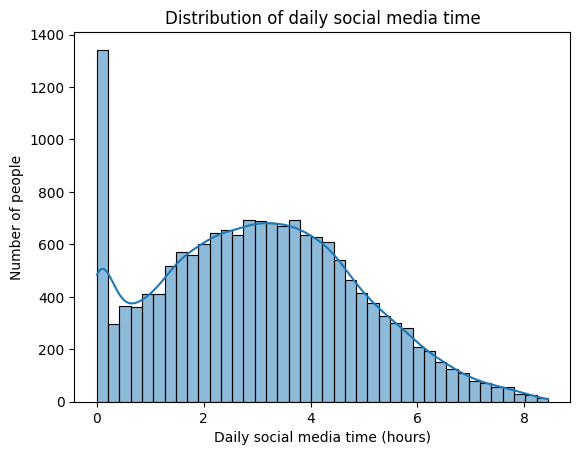

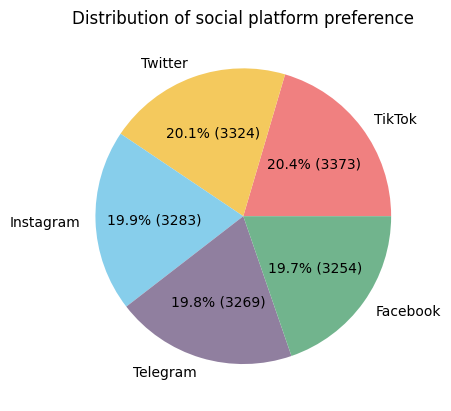

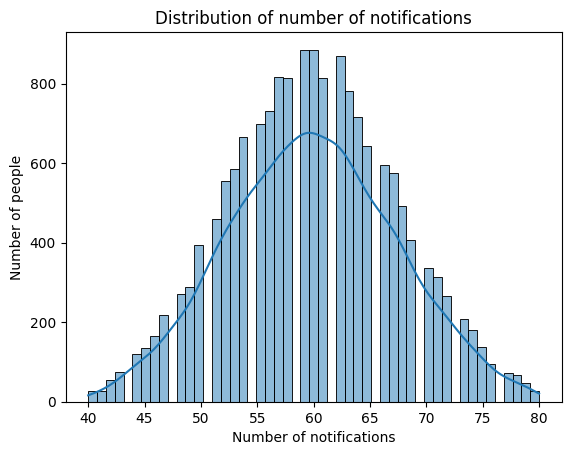

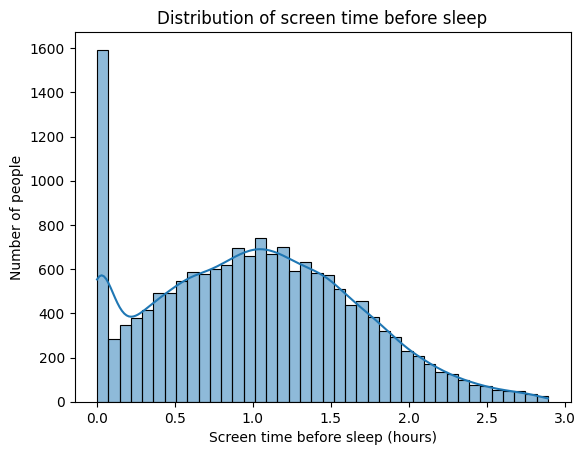

In [58]:
#SOCIAL MEDIA

#daily_social_media_time
sns.histplot(df['daily_social_media_time'], kde=True)
plt.title("Distribution of daily social media time")
plt.xlabel("Daily social media time (hours)")
plt.ylabel("Number of people")
plt.show()

print("\n")

#social_platform_preference
variable = df["social_platform_preference"].value_counts()
sizes = variable.values
total = sum(sizes)
variable.plot.pie(autopct=make_autopct(sizes), colors=['lightcoral', '#F4C95D', "skyblue", "#907F9F", "#71B48D", "#DD7230"])
plt.title("Distribution of social platform preference")
plt.ylabel('')
plt.show()

print("\n")

#number_of_notifications
sns.histplot(df['number_of_notifications'], kde=True)
plt.title("Distribution of number of notifications")
plt.xlabel("Number of notifications")
plt.ylabel("Number of people")
plt.show()

print("\n")

#screen_time_before_sleep
sns.histplot(df['screen_time_before_sleep'], kde=True)
plt.title("Distribution of screen time before sleep")
plt.xlabel("Screen time before sleep (hours)")
plt.ylabel("Number of people")
plt.show()

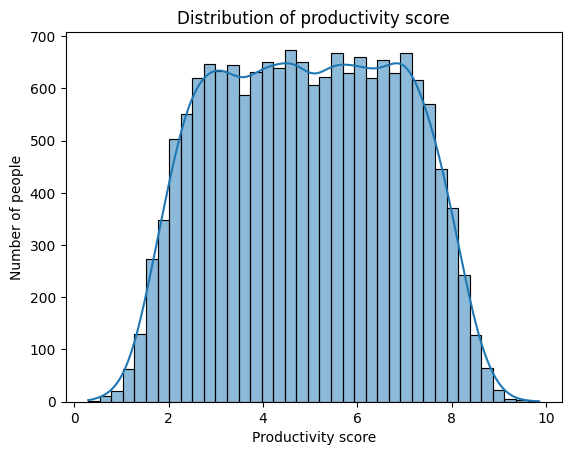

In [60]:
#PRODUCTIVITY

#actual_productivity_score
sns.histplot(df['actual_productivity_score'], kde=True)
plt.title("Distribution of productivity score")
plt.xlabel("Productivity score")
plt.ylabel("Number of people")
plt.show()

# Bivariate analysis (relationships between variables)

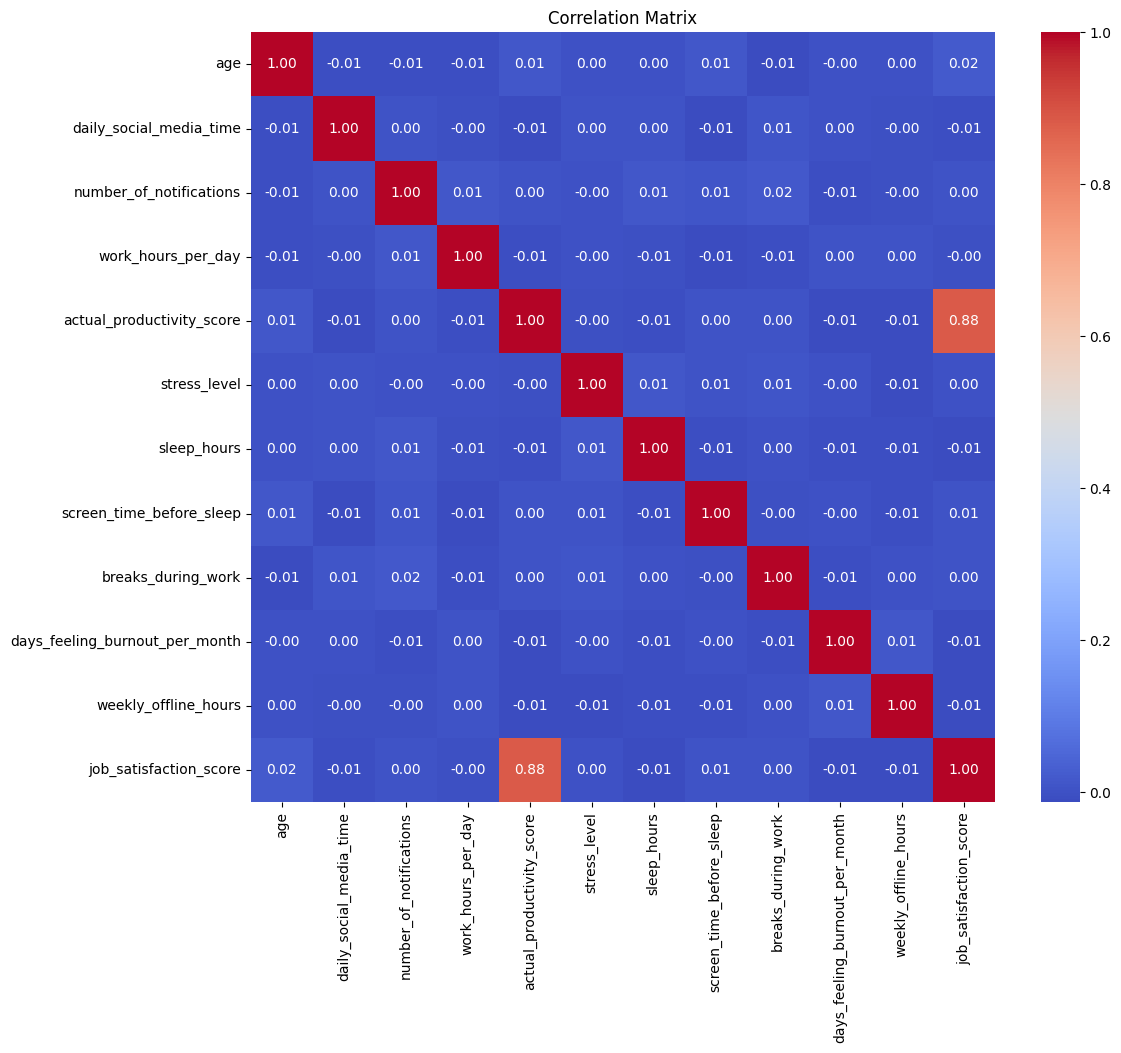

In [61]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [63]:
# Create a copy to work with
df_copy = df.copy()

daily_social_media_time + actual_productivity_score

Correlation: -0.0126 
Covariance: -0.044



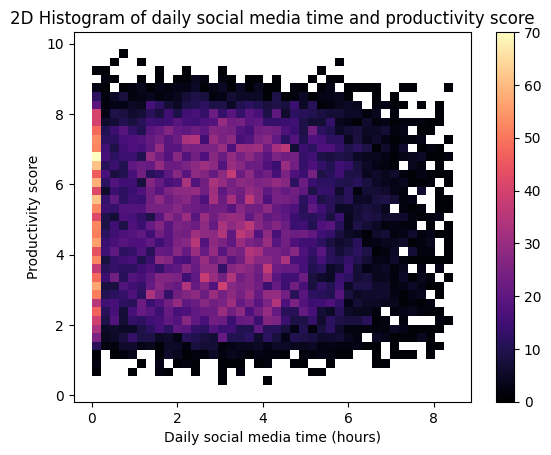

In [74]:
print('daily_social_media_time + actual_productivity_score\n')

correlation = df_copy['daily_social_media_time'].corr(df_copy['actual_productivity_score'])
covariance = df_copy['daily_social_media_time'].cov(df_copy['actual_productivity_score'])
print(f"Correlation: {round(correlation, 4)} \nCovariance: {round(covariance, 4)}\n")

sns.histplot(data=df_copy, x='daily_social_media_time', y='actual_productivity_score', cbar=True, cmap='magma')
plt.title('2D Histogram of daily social media time and productivity score')
plt.xlabel('Daily social media time (hours)')
plt.ylabel('Productivity score')
plt.show()

breaks_during_work + actual_productivity_score

Correlation: 0.0029 
Covariance: 0.0173



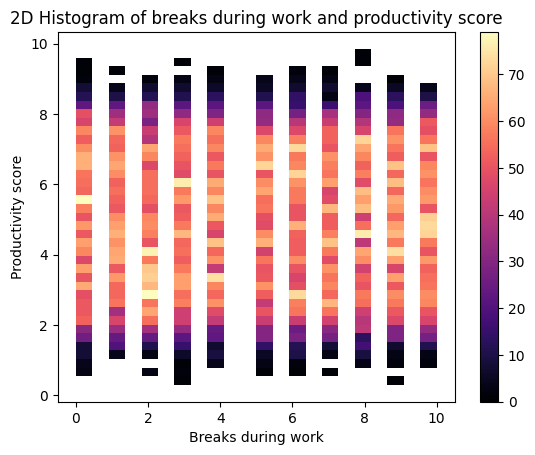

In [75]:
print('breaks_during_work + actual_productivity_score\n')

correlation = df_copy['breaks_during_work'].corr(df_copy['actual_productivity_score'])
covariance = df_copy['breaks_during_work'].cov(df_copy['actual_productivity_score'])
print(f"Correlation: {round(correlation, 4)} \nCovariance: {round(covariance, 4)}\n")

sns.histplot(data=df_copy, x='breaks_during_work', y='actual_productivity_score', cbar=True, cmap='magma')
plt.title('2D Histogram of breaks during work and productivity score')
plt.xlabel('Breaks during work')
plt.ylabel('Productivity score')
plt.show()

job_satisfaction_score + actual_productivity_score

Correlation: 0.8834 
Covariance: 3.5501



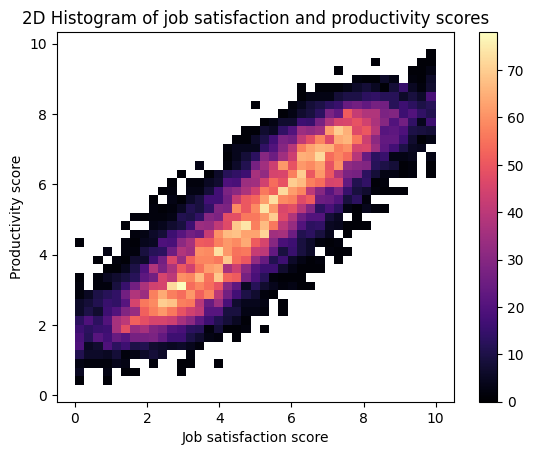

In [87]:
print('job_satisfaction_score + actual_productivity_score\n')

correlation = df_copy['job_satisfaction_score'].corr(df_copy['actual_productivity_score'])
covariance = df_copy['job_satisfaction_score'].cov(df_copy['actual_productivity_score'])
print(f"Correlation: {round(correlation, 4)} \nCovariance: {round(covariance, 4)}\n")

sns.histplot(data=df_copy, x='job_satisfaction_score', y='actual_productivity_score', cbar=True, cmap='magma')
plt.title('2D Histogram of job satisfaction and productivity scores')
plt.xlabel('Job satisfaction score')
plt.ylabel('Productivity score')
plt.show()

stress_level + actual_productivity_score

Correlation: -0.0025 
Covariance: -0.0136



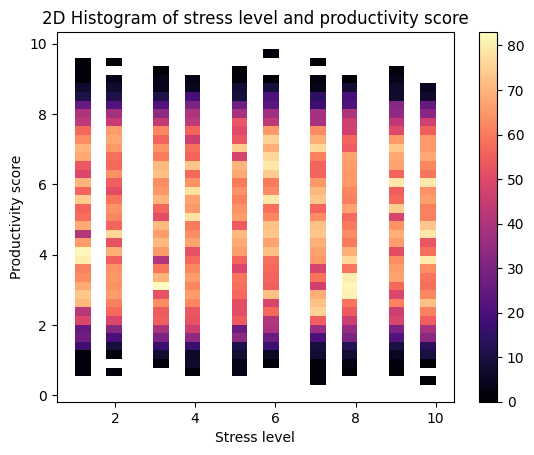

In [77]:
print('stress_level + actual_productivity_score\n')

correlation = df_copy['stress_level'].corr(df_copy['actual_productivity_score'])
covariance = df_copy['stress_level'].cov(df_copy['actual_productivity_score'])
print(f"Correlation: {round(correlation, 4)} \nCovariance: {round(covariance, 4)}\n")

sns.histplot(data=df_copy, x='stress_level', y='actual_productivity_score', cbar=True, cmap='magma')
plt.title('2D Histogram of stress level and productivity score')
plt.xlabel('Stress level')
plt.ylabel('Productivity score')
plt.show()

stress_level + screen_time_before_sleep

Correlation: 0.0062 
Covariance: 0.0114



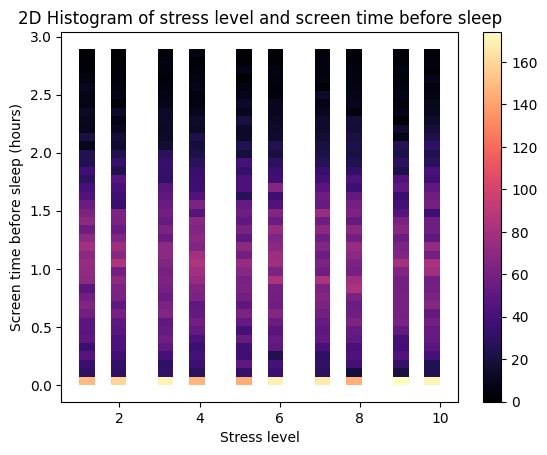

In [79]:
print('stress_level + screen_time_before_sleep\n')

correlation = df_copy['stress_level'].corr(df_copy['screen_time_before_sleep'])
covariance = df_copy['stress_level'].cov(df_copy['screen_time_before_sleep'])
print(f"Correlation: {round(correlation, 4)} \nCovariance: {round(covariance, 4)}\n")

sns.histplot(data=df_copy, x='stress_level', y='screen_time_before_sleep', cbar=True, cmap='magma')
plt.title('2D Histogram of stress level and screen time before sleep')
plt.xlabel('Stress level')
plt.ylabel('Screen time before sleep (hours)')
plt.show()

stress_level + days_feeling_burnout_per_month

Correlation: -0.001 
Covariance: -0.0256



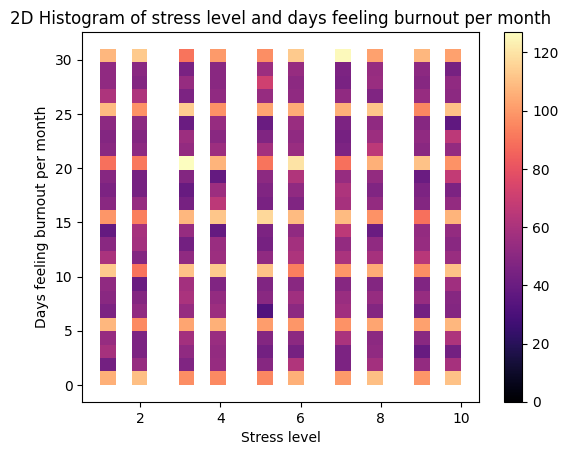

In [80]:
print('stress_level + days_feeling_burnout_per_month\n')

correlation = df_copy['stress_level'].corr(df_copy['days_feeling_burnout_per_month'])
covariance = df_copy['stress_level'].cov(df_copy['days_feeling_burnout_per_month'])
print(f"Correlation: {round(correlation, 4)} \nCovariance: {round(covariance, 4)}\n")

sns.histplot(data=df_copy, x='stress_level', y='days_feeling_burnout_per_month', cbar=True, cmap='magma')
plt.title('2D Histogram of stress level and days feeling burnout per month')
plt.xlabel('Stress level')
plt.ylabel('Days feeling burnout per month')
plt.show()

number_of_notifications + daily_social_media_time

Correlation: 0.0028 
Covariance: 0.0393



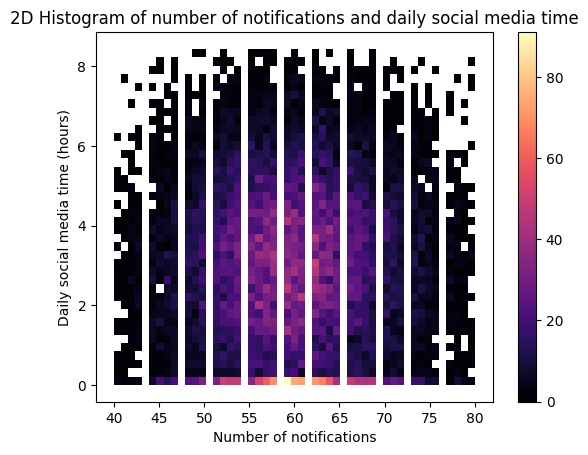

In [81]:
print('number_of_notifications + daily_social_media_time\n')

correlation = df_copy['number_of_notifications'].corr(df_copy['daily_social_media_time'])
covariance = df_copy['number_of_notifications'].cov(df_copy['daily_social_media_time'])
print(f"Correlation: {round(correlation, 4)} \nCovariance: {round(covariance, 4)}\n")

sns.histplot(data=df_copy, x='number_of_notifications', y='daily_social_media_time', cbar=True, cmap='magma')
plt.title('2D Histogram of number of notifications and daily social media time')
plt.xlabel('Number of notifications')
plt.ylabel('Daily social media time (hours)')
plt.show()

work_hours_per_day + actual_productivity_score

Correlation: -0.0077 
Covariance: -0.0285



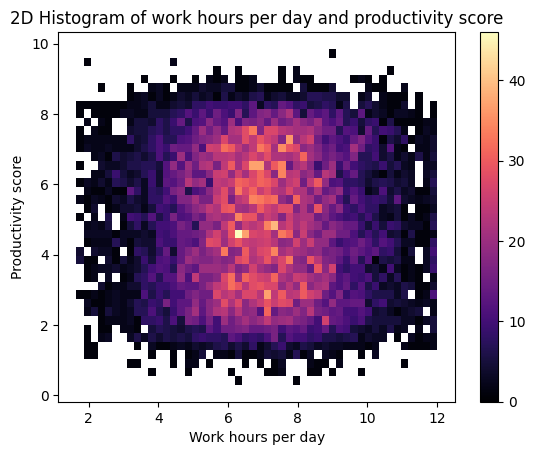

In [82]:
print('work_hours_per_day + actual_productivity_score\n')

correlation = df_copy['work_hours_per_day'].corr(df_copy['actual_productivity_score'])
covariance = df_copy['work_hours_per_day'].cov(df_copy['actual_productivity_score'])
print(f"Correlation: {round(correlation, 4)} \nCovariance: {round(covariance, 4)}\n")

sns.histplot(data=df_copy, x='work_hours_per_day', y='actual_productivity_score', cbar=True, cmap='magma')
plt.title('2D Histogram of work hours per day and productivity score')
plt.xlabel('Work hours per day')
plt.ylabel('Productivity score')
plt.show()